In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 

x,y =load_digits(return_X_y = True )
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2 )

v1 = y_train.shape[0]
v2 = y_test.shape[0]


In [13]:

k =  np.array([[0,0,0,0,0,0,0,0,0,0] for i in range(v1)])
k1 =  np.array([[0,0,0,0,0,0,0,0,0,0] for i in range(v2)])

c = 0 
for i in y_train:
    k[c][i] = 1 
    c = c + 1     
c = 0 
for i in y_test:
    k1[c][i] = 1 
    c = c + 1  
    
y_train = k
y_test = k1

shape of X_train : (1437, 64)
shape of Y_train : (1437, 10)
[1 0 0 0 0 0 0 0 0 0]


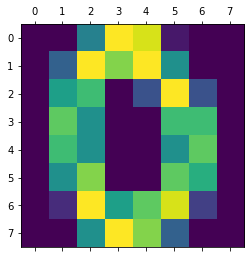

In [14]:
import matplotlib.pyplot as plt

print("shape of X_train :", x_train.shape)
print("shape of Y_train :", y_train.shape)

print(y_train[0])
plt.matshow(x_train[0].reshape(8,8))
plt.show()

In [15]:
import numpy as np

#activation function 
def Softmax(xp):
    k = np.array(np.exp(xp), dtype=np.float64)
    return k / np.sum(k , axis = 0)
def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return (1 - np.power(np.tanh(x), 2))


In [16]:
#weights initialization function 

#Xavier
def Xavier(dim_in,dim_hid,dim_out) :
    w1 = np.random.normal(0, 1/dim_in,size=(dim_hid, dim_in))
    b1 = np.zeros((dim_hid,1))
    w2 = np.random.normal(0, 1/ dim_hid,size=(dim_out, dim_hid))
    b2 = np.zeros((dim_out,1))
 
    weight = [w1,w2]
    bias = [b1,b2]
    return [weight,bias]

In [17]:
#forward and backward passes

def forward(xp,yp,params):
    weight,bias = params[0],params[1]
    b1,b2 = bias[0],bias[1]
    w1,w2 = weight[0],weight[1]
    z1 = np.dot(xp,w1.T) + b1.T
    a1 = tanh(z1)
    z2 = np.dot(a1,w2.T) + b2.T
    a2 = Softmax(z2)
    
    cache = [z1,a1,w1,b1,z2,a2,w2,b2]
    
    cost = -(1/yp.shape[0])*np.sum(yp*np.log(a2))
    return cost,cache,a2



def backward(xp,yp,cache,learnRate) :
    (z1,a1,w1,b1,z2,a2,w2,b2) = cache
    m = xp.shape[0]
    
    dz2 = a2 - yp 
    dw2 = (1/m) * np.dot(dz2.T , a1)
    db2 = (1/m) * np.sum(dz2.T,axis=1,keepdims=True)
    
    da1 = np.dot(dz2,w2)
    dz1 = (1/m) * np.multiply(da1,tanh_der(z1))
    dw1 = (1/m) * np.dot(dz1.T , xp)
    db1 =  np.sum(dz1.T,axis=1,keepdims = True) * 1/m
    
    b1 = b1 - learnRate * db1 
    b2 = b2 - learnRate * db2
    w2 = w2 - learnRate * dw2 
    w1 = w1 - learnRate * dw1
      
    return [[w1,w2],[b1,b2]]


    

In [30]:
dim_hid = 160

dim_in = x_train.shape[1]
dim_out = y_train.shape[1]
params = Xavier(dim_in,dim_hid,dim_out) 



epoch = 120
lr = .02
losses = []

for i in range(epoch):
    l , cache , a2 = forward(x_train,y_train,params)
    losses.append(l)
    params = backward(x_train,y_train,cache,lr)


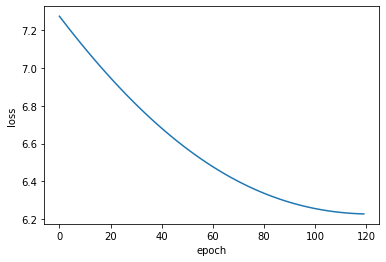

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, epoch),losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

cost,_,a2 = forward(x_test,y_test,params)
y_pred=np.argmax(a2 ,axis=1)
y_true=np.argmax(y_test, axis=1)


print(accuracy_score(y_true, y_pred))



0.9027777777777778
